## Use attention score to get relevance keywords

In [22]:
from transformers import BertTokenizer, BertModel
import torch

# Load pre-trained BERT model and tokenizer
model_name = 'bert-base-uncased'
tokenizer = BertTokenizer.from_pretrained(model_name)
model = BertModel.from_pretrained(model_name, output_attentions=True)

# Input sentence
text2 = "We are hiring for a Java Engineer with experience in JavaScript and PHP, You can customize the data and labels according to your needs"

# Tokenize and prepare input
inputs = tokenizer.encode_plus(text2, add_special_tokens=True, return_tensors='pt')
input_ids = inputs['input_ids']
attention_mask = inputs['attention_mask']

# Obtain attention scores
outputs = model(input_ids, attention_mask=attention_mask)
attention_scores = outputs.attentions

# Identify keyword tokens
keywords = ["java", "javaScript", "php"]
keyword_token_ids = [tokenizer.encode(keyword, add_special_tokens=False) for keyword in keywords]



Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertModel: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias', 'cls.predictions.decoder.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.weight']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [31]:

listWordText2 = text2.split()
print('len(listWordText2)', len(listWordText2), len(input_ids[0]))
print('attention_scores', attention_scores[0][0][0][0], attention_scores[0][0][0][0].shape)
tokens = tokenizer.convert_ids_to_tokens(input_ids[0])
print('tokens', tokens)
# Calculate keyword importance
# keyword_importance = []
# for keyword_ids in keyword_token_ids:
#     keyword_scores = []
#     for layer_attention_scores in attention_scores:
#         print('layer_attention_scores', layer_attention_scores.shape, keyword_ids)
#         print(layer_attention_scores[0][0][0])
#         layer_keyword_scores = torch.mean(layer_attention_scores[:,:, keyword_ids, :], dim=1)
#         keyword_scores.append(layer_keyword_scores)
    # keyword_scores = torch.stack(keyword_scores, dim=0)
    # keyword_scores = torch.mean(keyword_scores, dim=0)
    # keyword_importance.append(torch.mean(keyword_scores).item())

# Print keyword importance
# for keyword, importance in zip(keywords, keyword_importance):
#     print(f"Keyword: {keyword}, Importance: {importance}")

len(listWordText2) 24 29
attention_scores tensor([0.0269, 0.0113, 0.0221, 0.0164, 0.0359, 0.0754, 0.0226, 0.0207, 0.0681,
        0.0261, 0.0473, 0.0233, 0.0110, 0.0493, 0.0090, 0.0263, 0.0195, 0.0348,
        0.0213, 0.0153, 0.0658, 0.0361, 0.0490, 0.0149, 0.0391, 0.0624, 0.0217,
        0.0214, 0.1071], grad_fn=<SelectBackward0>) torch.Size([29])
tokens ['[CLS]', 'we', 'are', 'hiring', 'for', 'a', 'java', 'engineer', 'with', 'experience', 'in', 'java', '##script', 'and', 'php', ',', 'you', 'can', 'custom', '##ize', 'the', 'data', 'and', 'labels', 'according', 'to', 'your', 'needs', '[SEP]']


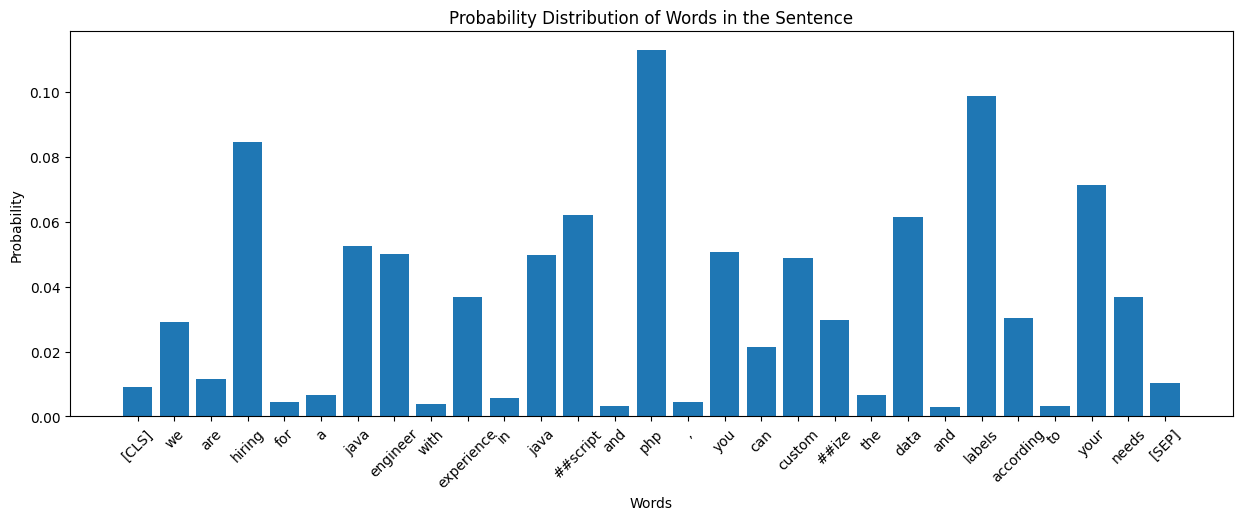

In [36]:
# import pylot
import matplotlib.pyplot as plt
import torch
probabilities = attention_scores[0][0][0][6].detach().numpy().tolist()

plt.figure(figsize=(15, 5))  
plt.bar(range(len(tokens)), probabilities)
plt.xticks(range(len(tokens)), tokens, rotation=45)
plt.xlabel('Words')
plt.ylabel('Probability')
plt.title('Probability Distribution of Words in the Sentence')
plt.show()


In [43]:
def topWordRelevance(text, word = '', top=5):
    inputs = tokenizer.encode_plus(text, add_special_tokens=True, return_tensors='pt')
    input_ids = inputs['input_ids']
    attention_mask = inputs['attention_mask']
    outputs = model(input_ids, attention_mask=attention_mask)
    attention_scores = outputs.attentions
    tokens = tokenizer.convert_ids_to_tokens(input_ids[0])

    word = word.lower()
    if word not in tokens:
        print('Word not found in the sentence')
        print(tokens)
        return False

    word = tokenizer.encode(word, add_special_tokens=False)
    wordId = word[0]
    # get index wordId in list input_ids
    wordIndex = input_ids[0].tolist().index(wordId)
    probabilities = attention_scores[0][0][0][wordIndex].detach().numpy().tolist()
    topWord = sorted(zip(tokens, probabilities), key=lambda x: x[1], reverse=True)[:top]
    return topWord

In [44]:
text3 = """
SEOUL (Reuters) - Jung Kook, a member of K-Pop supergroup BTS, officially launched on 
Friday his solo career with the release of single "Seven", a track also featuring American rapper Latto
"""
results = topWordRelevance(text3, 'track', 3)
print(results)

[('reuters', 0.06888358294963837), ('solo', 0.060524679720401764), ('release', 0.05888727307319641)]
